In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, mean_squared_error, r2_score
import numpy as np
from sklearn.cluster import KMeans

dataset = pd.read_csv("..\\Dataset\\meal.csv")
#Seprating dataset into input and output values
#print(x.to_string())
x = dataset[['Meal_Id','Name','catagory','description','Veg_Non','Nutrient','Disease','Diet']]
print(x)

     Meal_Id                        Name catagory  \
0          1         summer squash salad    salad   
1          2        chicken minced salad    salad   
2          3        sweet chilli almonds   chilli   
3          4             tricolour salad    salad   
4          5  gluten-free christmas cake     cake   
..       ...                         ...      ...   
507      305                  sunga pork    curry   
508      306                banana chips   banana   
509      307                 bhurji- egg      egg   
510      308       flattened rice / pohe     rice   
511      309                 puffed rice     rice   

                                           description  Veg_Non  \
0    white balsamic vinegar, lemon juice, lemon rin...      veg   
1    olive oil, chicken mince, garlic (minced), oni...  non-veg   
2    almonds whole, egg white, curry leaves, salt, ...      veg   
3    vinegar, honey/sugar, soy sauce, salt, garlic ...      veg   
4    christmas dry fruits (p

## encoder

In [25]:
from sklearn.preprocessing import LabelEncoder

# Creazione dell'oggetto LabelEncoder
label_encoder = LabelEncoder()

# Codifica delle variabili categoriche come valori numerici
X_encoded = x.copy()  # Copia dei dati originali
X_encoded['Name'] = label_encoder.fit_transform(x['Name'])
X_encoded['catagory'] = label_encoder.fit_transform(x['catagory'])
X_encoded['description'] = label_encoder.fit_transform(x['description'])
X_encoded['Veg_Non'] = label_encoder.fit_transform(x['Veg_Non'])
X_encoded['Nutrient'] = label_encoder.fit_transform(x['Nutrient'])
X_encoded['Disease'] = label_encoder.fit_transform(x['Disease'])
X_encoded['Diet'] = label_encoder.fit_transform(x['Diet'])


In [26]:
from sklearn.preprocessing import OneHotEncoder

# Creazione dell'oggetto OneHotEncoder
encoder = OneHotEncoder()
X_encoded = X_encoded.values
# Adattamento del modello agli dati
encoder.fit(X_encoded)

# Trasformazione dei dati di addestramento
X_encoded = encoder.transform(X_encoded).toarray()


## Standard scaler

In [27]:
from sklearn.preprocessing import StandardScaler

# Creazione di un oggetto StandardScaler
scaler = StandardScaler()

# Trasformazione e adattamento dei dati di addestramento
X_scaled = scaler.fit_transform(X_encoded)

In [28]:
print(x)

     Meal_Id                        Name catagory  \
0          1         summer squash salad    salad   
1          2        chicken minced salad    salad   
2          3        sweet chilli almonds   chilli   
3          4             tricolour salad    salad   
4          5  gluten-free christmas cake     cake   
..       ...                         ...      ...   
507      305                  sunga pork    curry   
508      306                banana chips   banana   
509      307                 bhurji- egg      egg   
510      308       flattened rice / pohe     rice   
511      309                 puffed rice     rice   

                                           description  Veg_Non  \
0    white balsamic vinegar, lemon juice, lemon rin...      veg   
1    olive oil, chicken mince, garlic (minced), oni...  non-veg   
2    almonds whole, egg white, curry leaves, salt, ...      veg   
3    vinegar, honey/sugar, soy sauce, salt, garlic ...      veg   
4    christmas dry fruits (p

## Oversampling

In [ ]:
#%pip install scikit-learn==1.2.2

ERROR: Could not install packages due to an OSError: [WinError 5] Accesso negato: 'C:\\Users\\perna\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\~~learn\\.libs\\msvcp140.dll'
Check the permissions.




  Using cached scikit_learn-1.2.2-cp39-cp39-win_amd64.whl (8.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [ ]:
from sklearn.utils._param_validation import _MissingValues
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
x_ros, y_ros = ros.fit_resample(x, y)
# new class distribution 
print(Counter(y_ros))
Counter({0: 9844, 1: 9844})

Counter({2111: 3, 2288: 3, 2660: 3, 2255: 3, 2604: 3, 2049: 3, 1980: 3, 2282: 3, 2166: 3, 2755: 3, 2466: 3, 2175: 3, 3084: 3, 2526: 3, 2367: 3, 2308: 3, 2486: 3, 2390: 3, 2388: 3, 2094: 3, 2219: 3, 2067: 3, 2778: 3, 2625: 3, 2885: 3, 2004: 3, 2199: 3, 2342: 3, 2265: 3, 2159: 3, 2382: 3, 2736: 3, 2270: 3, 1836: 3, 1973: 3, 1878: 3, 1811: 3, 2222: 3, 1165: 3, 1108: 3, 1429: 3, 1138: 3, 2609: 3, 2043: 3, 1885: 3, 1969: 3, 2178: 3, 2125: 3, 1794: 3, 1862: 3, 1503: 3, 1675: 3, 1882: 3, 1291: 3, 2129: 3, 1700: 3, 1667: 3, 2384: 3, 1630: 3, 2092: 3, 1844: 3, 2171: 3, 1673: 3, 1442: 3, 1689: 3, 1534: 3, 2120: 3, 1791: 3, 1343: 3, 1555: 3, 1037: 3, 1774: 3, 1585: 3, 2174: 3, 1264: 3, 2326: 3, 2358: 3, 2536: 3, 2080: 3, 1739: 3, 1722: 3, 1637: 3, 1313: 3, 1315: 3, 1783: 3, 845: 3, 1473: 3, 1163: 3, 2147: 3, 1955: 3, 1813: 3, 947: 3, 1823: 3, 1483: 3, 1472: 3, 1872: 3, 2298: 3, 2170: 3, 1099: 3, 2315: 3, 977: 3, 1691: 3, 1947: 3, 2044: 3, 2063: 3, 1748: 3, 1009: 3, 1526: 3, 1135: 3, 1249: 3, 1468

Counter({0: 9844, 1: 9844})

In [ ]:
print(x_ros)

     bmi  gender  age
0     17       1   38
1     11       1   34
2     13       1   32
3     15       1   45
4     18       1   48
..   ...     ...  ...
547   15       0   31
548   16       0   35
549   16       0   35
550   16       1   47
551   16       1   47

[552 rows x 3 columns]


In [ ]:
print(y_ros)

0      2111
1      2288
2      2660
3      2255
4      2604
       ... 
547    2778
548    2885
549    2885
550    3084
551    3084
Name: calorie_intake, Length: 552, dtype: int64


## K-means

In [34]:
from sklearn.metrics import silhouette_score

k_values = range(2, 512)
# Calcola il valore medio della silhouette per ogni valore di k
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init = 10)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Visualizza il grafico della silhouette analysis
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Numero di cluster (k)')
plt.ylabel('Valore medio della silhouette')
plt.title('Grafico della Silhouette Analysis')
optimal_k = k_values[np.argmax(silhouette_scores)]
plt.axvline(x=optimal_k, color='r', linestyle='--')
plt.text(optimal_k + 0.1, max(silhouette_scores) - 0.1, f'k = {optimal_k}', color='r')
plt.show()

KeyboardInterrupt: 

C:\Users\perna\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


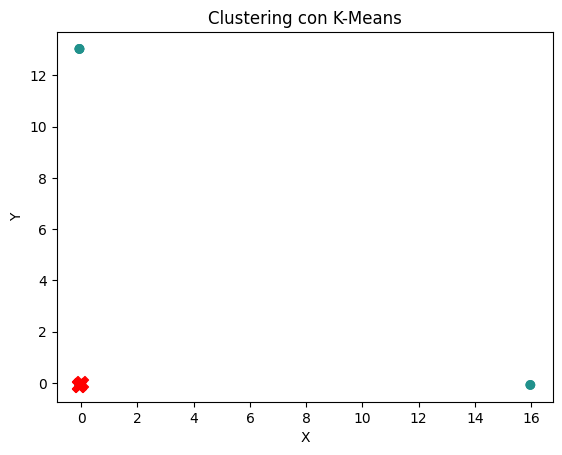

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# Creazione dell'oggetto KMeans
kmeans = KMeans(n_clusters=3)

# Addestramento del modello sui dati
kmeans.fit(X_scaled)

# Etichettatura dei punti
labels = kmeans.labels_

# Ottenere i centroidi
centroids = kmeans.cluster_centers_

# Plot dei punti colorati secondo l'etichetta del cluster
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
# Plot dei centroidi
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clustering con K-Means')
plt.show()

In [32]:
# Alternatively, you can create a new dataframe with the instances and labels
labels_df = pd.DataFrame({'Id_Meal': x['Meal_Id'], 'KMeans_Labels': kmeans.labels_})

# Save the dataframe to a file
labels_df.to_csv('instances_with_labels.csv', index=False)
